# Imports 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [68]:
df=pd.read_csv("billboard_hot_100.csv")
df.shape
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [69]:
df.tail()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1
330086,1958-08-04,100,Judy,Frankie Vaughan,NaN,100,1


In [70]:
df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

In [71]:
# Get count of unique artists
df['artist'].nunique()

10205

In [72]:
# Get top 10 artists
df['artist'].value_counts().head(10)

Taylor Swift     1023
Elton John        889
Madonna           857
Drake             787
Kenny Chesney     769
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: artist, dtype: int64

# The Ye

### The Ye Chart

In [73]:
# Get Kanye West's top 10 songs by weeks on the board
kanye_west_df = df[df['artist'] == 'Kanye West']
kanye_west_df.sort_values(by='weeks-on-board', ascending=False).head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
64750,2009-06-13,51,Heartless,Kanye West,48.0,2,30
64847,2009-06-06,48,Heartless,Kanye West,35.0,2,29
64934,2009-05-30,35,Heartless,Kanye West,45.0,2,28
65044,2009-05-23,45,Heartless,Kanye West,33.0,2,27
71745,2008-02-09,46,Stronger,Kanye West,38.0,1,27
65132,2009-05-16,33,Heartless,Kanye West,33.0,2,26
71837,2008-02-02,38,Stronger,Kanye West,34.0,1,26
88949,2004-10-23,50,Jesus Walks,Kanye West,47.0,11,25
65232,2009-05-09,33,Heartless,Kanye West,32.0,2,25
54046,2011-07-02,47,All Of The Lights,Kanye West,38.0,18,25


In [77]:
kanye_west_df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
54,2021-11-06,55,Hurricane,Kanye West,58.0,6,9
79,2021-11-06,80,Praise God,Kanye West,89.0,20,5
157,2021-10-30,58,Hurricane,Kanye West,50.0,6,8
188,2021-10-30,89,Praise God,Kanye West,99.0,20,4
249,2021-10-23,50,Hurricane,Kanye West,44.0,6,7


In [74]:
kanye_west_df.sort_values('rank')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
73600,2007-09-29,1,Stronger,Kanye West,2.0,1,8
73301,2007-10-20,2,Stronger,Kanye West,2.0,1,11
73401,2007-10-13,2,Stronger,Kanye West,2.0,1,10
73501,2007-10-06,2,Stronger,Kanye West,1.0,1,9
66301,2009-02-21,2,Heartless,Kanye West,3.0,2,14
...,...,...,...,...,...,...,...
798,2021-09-18,99,Remote Control,Kanye West,40.0,40,2
27599,2016-07-30,100,Father Stretch My Hands Pt. 1,Kanye West,NaN,37,11
57899,2010-10-09,100,POWER,Kanye West,67.0,22,13
499,2021-10-09,100,Moon,Kanye West,76.0,17,5


<AxesSubplot:xlabel='date', ylabel='peak-rank'>

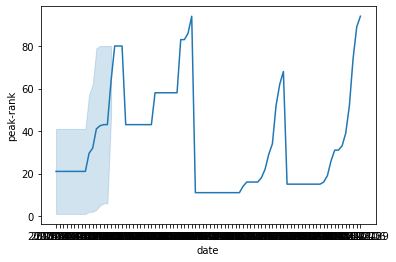

In [75]:
sns.lineplot(x='date',y='peak-rank', data=kanye_west_df[-100:])

<AxesSubplot:xlabel='song'>

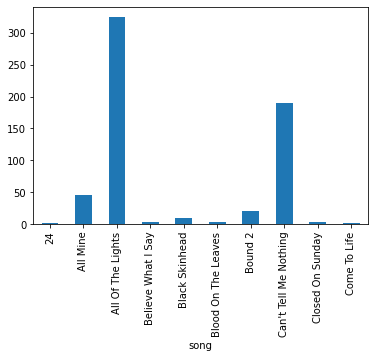

In [79]:
kanye_west_df_week = kanye_west_df.groupby("song")
kanye_west_df_week['weeks-on-board'].sum()[:10].plot(kind='bar')
